# Exercise-2: Training Deep Neural Network on CIFAR-10

Train a controlled deep neural network on the CIFAR-10 dataset. Set random seeds to 42. Load and preprocess CIFAR-10. Build the network using the following configuration:
- Flatten input images to 32 × 32 × 3 = 3072 features
- 4 hidden layers, 256 neurons each
- ELU activation function
- He normal initialization
- Output layer: 10 neurons with softmax
- Optimizer: Nadam
- learning_rate = 0.001, loss =′ sparse_categorical_crossentropy′
- EarlyStopping callback: monitor validation loss, patience = 5, restore best weights
- epochs = 50, batch_size = 128
- Use only the first 5000 training samples and first 1000 test samples

## Q2.1 Report the obtained test accuracy.

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
import numpy as np

loss_function = 'sparse_categorical_crossentropy'
output_activation = 'softmax'
initializer = 'he_normal'
learning_rate = 0.001 
hidden_neurons = 256
output_neurons = 10
optimizer = 'Nadam'
activation = 'elu'
random_seed = 42
batch_size = 128
epochs = 50

# Set random seeds to 42
set_seed(42)
np.random.seed(42)

# Load cifar-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Use only the first 5000 training samples and first 1000 test samples
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

# Preprocess the data by flattening and normalizing, 32x32x3 to 3072 features
x_train = x_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
x_test = x_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Build the model
model = Sequential()
# Add hidden layers
model.add(Dense(hidden_neurons, 
                        activation=activation, 
                        kernel_initializer=initializer, 
                        input_shape=(32 * 32 * 3,)))
model.add(Dense(hidden_neurons, 
                        activation=activation, 
                        kernel_initializer=initializer))
model.add(Dense(hidden_neurons, 
                        activation=activation, 
                        kernel_initializer=initializer))
model.add(Dense(hidden_neurons, 
                        activation=activation, 
                        kernel_initializer=initializer))

# add output layer
model.add(Dense(output_neurons, activation=output_activation))
# Compile the model, with specified optimizer and loss function
model.compile(optimizer=Nadam(learning_rate=learning_rate),
              loss=loss_function,
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                     patience=5, 
                     restore_best_weights=True)
# Train the model
history = model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.2, 
          callbacks=[early_stopping],
          verbose=1)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/50


/opt/miniconda3/envs/envAssignments/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1570 - loss: 3.5349 - val_accuracy: 0.2200 - val_loss: 2.1185
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2718 - loss: 2.0133 - val_accuracy: 0.2590 - val_loss: 2.0119
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3207 - loss: 1.9006 - val_accuracy: 0.2780 - val_loss: 1.9938
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3485 - loss: 1.8213 - val_accuracy: 0.2780 - val_loss: 1.9972
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3730 - loss: 1.7623 - val_accuracy: 0.2990 - val_loss: 1.9490
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3868 - loss: 1.7107 - val_accuracy: 0.3290 - val_loss: 1.9014
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4075 - loss: 1.6569 - val_accuracy: 0.3600 - val_loss: 1.8683
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4263 - loss: 1.6088 - val_accuracy: 0.3530 - val_loss: 1.8710
Epo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


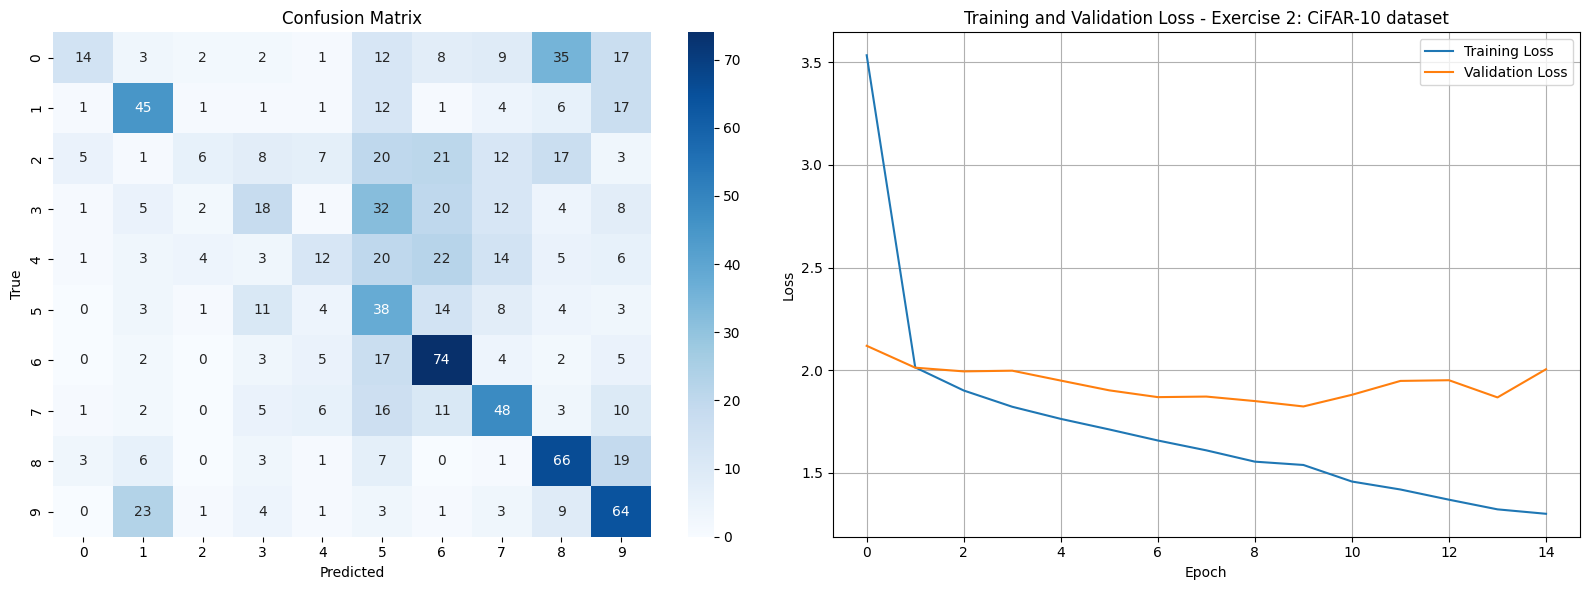

In [3]:
from helper import plot_model_evaluation

# Plot model evaluation
plot_model_evaluation(model, x_test, y_test, history, exercise_title='Exercise 2: CiFAR-10 dataset')

**Training loss**
[Training loss is the calculated error when the model makes predictions on the training data. It is updated after every forward and backward pass of the model during the training process.](https://www.geeksforgeeks.org/deep-learning/training-and-validation-loss-in-deep-learning/#what-is-training-loss)

- It is expected to decrease during training
- Can give insights into how well the model is learning the training data

**Common Training Loss Functions:**
- Mean Squared Error (MSE): Used for regression tasks.
- Cross-Entropy Loss: Common for classification problems.

**Validation loss**
[Validation loss evaluates the model's performance on a separate dataset (validation set) that the model has never seen during training. This metric provides an indication of how well the model generalizes to new data.](https://www.geeksforgeeks.org/deep-learning/training-and-validation-loss-in-deep-learning/#what-is-training-loss)

- Helps in assessing the model's generalization.
- Should decrease initially, but if it starts increasing while training loss decreases, this indicates overfitting.
- Used as criterion for early stopping.

https://www.geeksforgeeks.org/deep-learning/training-and-validation-loss-in-deep-learning/#what-is-training-loss